# This is a practice for the potential flow simulation from Sebastian Thomas Lecture

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from matplotlib.patches import Rectangle
from matplotlib.ticker import LinearLocator

# Defining Geometric Parameters

In [83]:
Lx = 20
Ly = 11
nx = 201
ny = 111
dx = Lx/(nx-1)
dy = Ly/(ny-1)


# Positions of the rectangular obstacles

In [84]:
box_imin = [30,60]
box_imax = [50,80]
box_jmin = [60,90]
box_jmax = [80,110]
box_colors = ['gray', 'gray']

X, Y = np.meshgrid(np.linspace(0,Lx,nx), np.linspace(0,Ly,ny))

# Time-step and specific parameters

In [85]:
numSteps = 40000
Uinf = 1

# Initializing arrays

In [86]:
phi = np.zeros([ny, nx])
U = np.zeros([ny, nx])
V = np.zeros([ny, nx])
err = np.zeros([numSteps, 1])

# Begin the time-stepping

In [87]:
for t in range(0, numSteps):

    phi_old = np.copy(phi)

    # Solving the numerical Laplacian
    phi[1:-1, 1:-1] = 0.25*(phi_old[0:-2, 1:-1] + phi_old[2:,1:-1] + phi_old[1:-1, 0:-2] + phi_old[1:-1,2:])

    # Fairfield Boundaries
    phi[0:-1, 0] = phi[0:-1,1] - Uinf*dx
    phi[0:-1, -1] = phi[0:-1,-2] + Uinf*dx

    phi[0,0:-1] = phi[1,0:-1]
    phi[-1,0:-1] = phi[-2,0:-1]

    # Boxes are impenetrable
    for bc in range(0,len(box_imin)):
        phi[box_imin[bc]:box_imax[bc],box_jmin[bc]] = phi[box_imin[bc]:box_imax[bc],box_jmin[bc]-1]
        phi[box_imin[bc]:box_imax[bc],box_jmax[bc]] = phi[box_imin[bc]:box_imax[bc],box_jmax[bc]+1]
        phi[box_imin[bc],box_jmin[bc]+1:box_jmax[bc]-1] = phi[box_imin[bc]-1,box_jmin[bc]+1:box_jmax[bc]-1]
        phi[box_imax[bc],box_jmin[bc]+1:box_jmax[bc]-1] = phi[box_imax[bc]+1,box_jmin[bc]+1:box_jmax[bc]-1]

    err[t] = np.linalg.norm(phi-phi_old)

# Calculate velocities from the potential

In [88]:
U[1:-1,1:-1] = (phi[1:-1,1:-1] - phi[1:-1,0:-2])/dx
V[1:-1,1:-1] = (phi[1:-1,1:-1] - phi[0:-2,1:-1])/dy
vel_sq = (U[1:-1,1:-1]*U[1:-1,1:-1]+V[1:-1,1:-1]*V[1:-1,1:-1])

# Pressure coeffcient

In [89]:
Cp = 1 - vel_sq/(Uinf*Uinf)

# Make plots

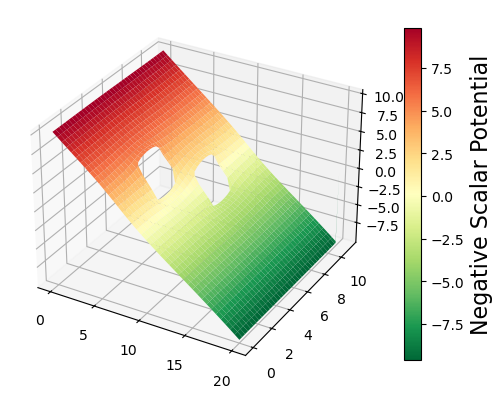

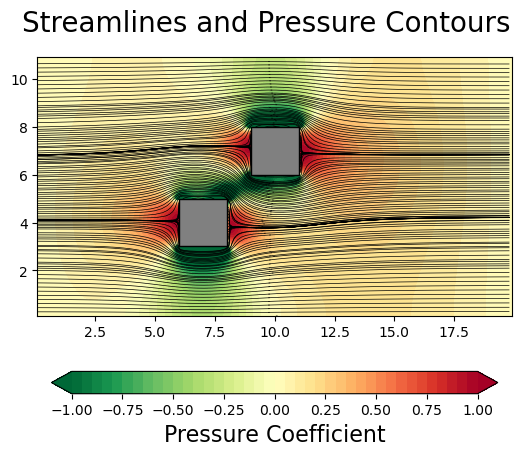

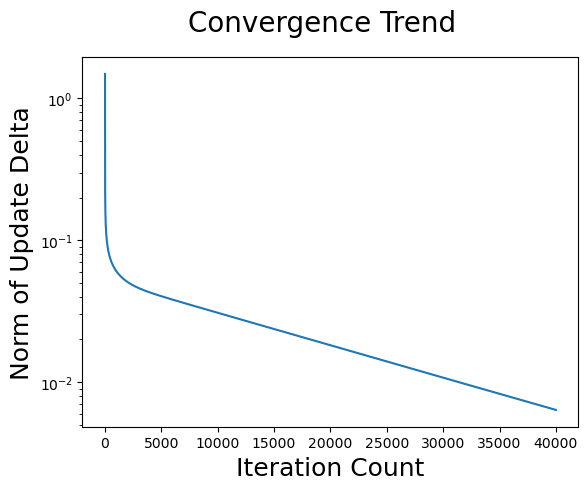

In [90]:
fig1 = plt.figure()
ax1 = plt.axes(projection ='3d')

mask = np.zeros(U.shape, dtype=bool)
for bc in range(0,len(box_imin)):
    mask[box_imin[bc]:box_imax[bc], box_jmin[bc]:box_jmax[bc]] = True
phi = np.ma.array(phi, mask=mask)
cs1 = ax1.plot_surface(X, Y, -phi,cmap='RdYlGn_r')

cb1 = fig1.colorbar(cs1, ax=ax1, shrink=0.9,location="right")
cb1.set_label('Negative Scalar Potential',fontsize=16)

fig, ax = plt.subplots()
ax.streamplot(X[1:-2,1:-2], Y[1:-2,1:-2],U[1:-2,1:-2],V[1:-2,1:-2],2.0,color='k',linewidth=0.5,arrowstyle='-',broken_streamlines=False)#, color = np.flipud(speed))#, linewidth = 2, cmap ='autumn')
cs=ax.contourf(X[1:-1,1:-1], Y[1:-1,1:-1], Cp,np.linspace(-1,1,41),cmap='RdYlGn_r',extend='both')
cb = fig.colorbar(cs, ax=ax, shrink=0.9,location="bottom")
cb.set_label('Pressure Coefficient',fontsize=16)

for bc in range(0,len(box_imin)):
    ax.add_patch(Rectangle( (Lx*(box_jmin[bc])/(nx-1), Ly*(box_imin[bc])/(ny-1)), Lx*(box_jmax[bc]-box_jmin[bc])/(nx-1), Ly*(box_imax[bc]-box_imin[bc])/(ny-1),zorder=10,edgecolor = 'k',
                 facecolor = box_colors[bc],
                 fill=True,
                 lw=1 ))

ax.set_aspect('equal', adjustable='box')
plt.suptitle("Streamlines and Pressure Contours",fontsize=20)

fig1, ax1 = plt.subplots()
ax1.plot(err)
plt.yscale("log")
ax1.set_ylabel('Norm of Update Delta', fontsize=18)
ax1.set_xlabel('Iteration Count', fontsize=18)
plt.suptitle("Convergence Trend",fontsize=20)

plt.show()